In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6, 4]


In [10]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]

data_path1='./SYS809_projet2021_sequences1/livre1_old.JPG'
data_path2='./SYS809_projet2021_sequences1/livre2_old.JPG'
img1 = cv2.imread(data_path1)
img2 = cv2.imread(data_path2)
gray_img1 = cv2.imread(data_path1 , cv2.IMREAD_GRAYSCALE) 
gray_img2 = cv2.imread(data_path2, cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img1)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#Le champ .pt des object KeyPoint contiennent la position du point-cle

img1=cv2.drawKeypoints(img1,kp1,None)
img2=cv2.drawKeypoints(img2,kp2,None)
#cv2.imwrite('./images_et_fichier/sift_keypoints1.jpg',img1)
#cv2.imwrite('./images_et_fichier/sift_keypoints2.jpg',img2)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

#knnMatch retourne les 2 plus proche voisin pour chaque membre de des1
matches = flann.knnMatch(des1,des2,k=2)
#Les objects DMatch contiennent index de du point-cle de ds1 match dans le champ queryIdx
#et l'index du point-cle appartenant a des2 dans le champ trainIdx

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]


# ratio test as per Lowe's paper,
good = []
for i,(m,n) in enumerate(matches):
    if m.distance <.7*n.distance:
        good.append(m)
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = -1, #(0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
print("len match:", len(matches))
print("len good:", len(good))
plt.imshow(img3,),plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_17828/65849942.py, line 49)

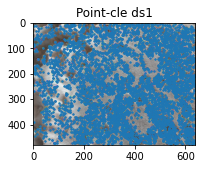

In [ ]:
img1_pts = np.float32([ kp.pt for kp in kp1 ])
plt.subplot(1, 2, 1)
x,y = zip(*img1_pts)
plt.imshow(img1)
plt.scatter(x,y, s=[2])
plt.title("Point-cle ds1")
plt.xlim([0,gray_img1.shape[1]])
plt.ylim([0,gray_img1.shape[0]])
plt.gca().invert_yaxis()



In [ ]:
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
tf.__version__
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18398727335805398523
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6469084774
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7483653822391208368
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import os
import cv2
import numpy as np
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
   
def load_img(img_path,img_shape):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = image.load_img(img_path , target_size=(img_rows, img_cols))    
    img = image.img_to_array(img) 
    img = np.expand_dims(img, axis=0)

    img =  preprocess_input(img)


    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return img

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16


model = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


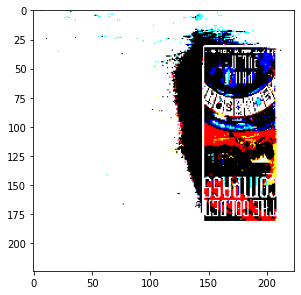

In [ ]:
from tensorflow.keras import backend as K

get_layer_output = K.function([model.input], [model.layers[-2].output])

data_path='./SYS809_projet2021_sequences1/livre1.JPG'
img_shape=[224,224]
img = load_img(data_path,img_shape)

plt.imshow(img[0])




In [ ]:
#print(model.summary())
print(img.shape)

(1, 224, 224, 3)


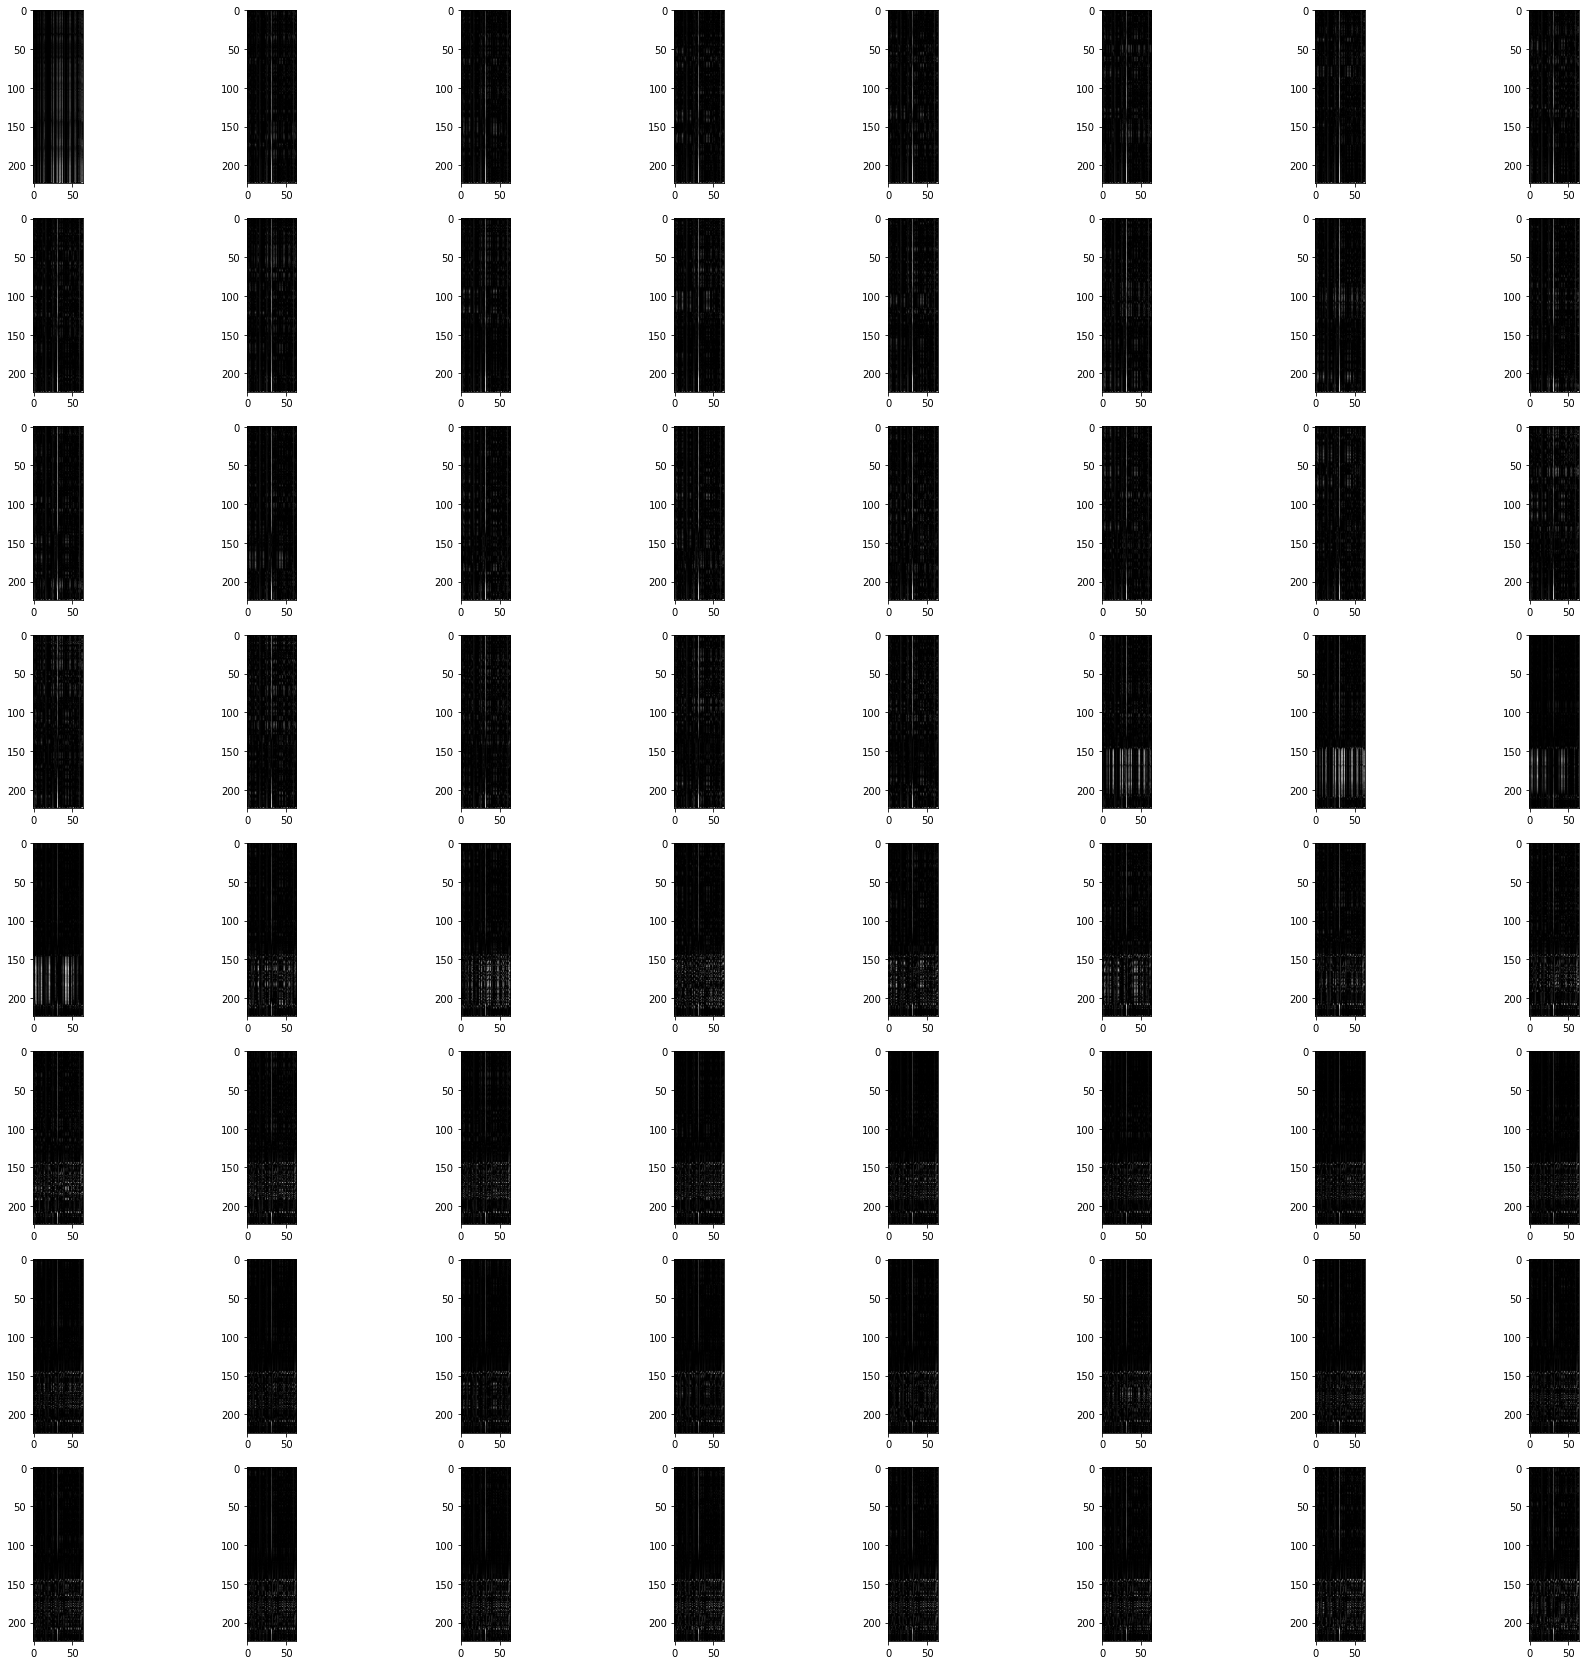

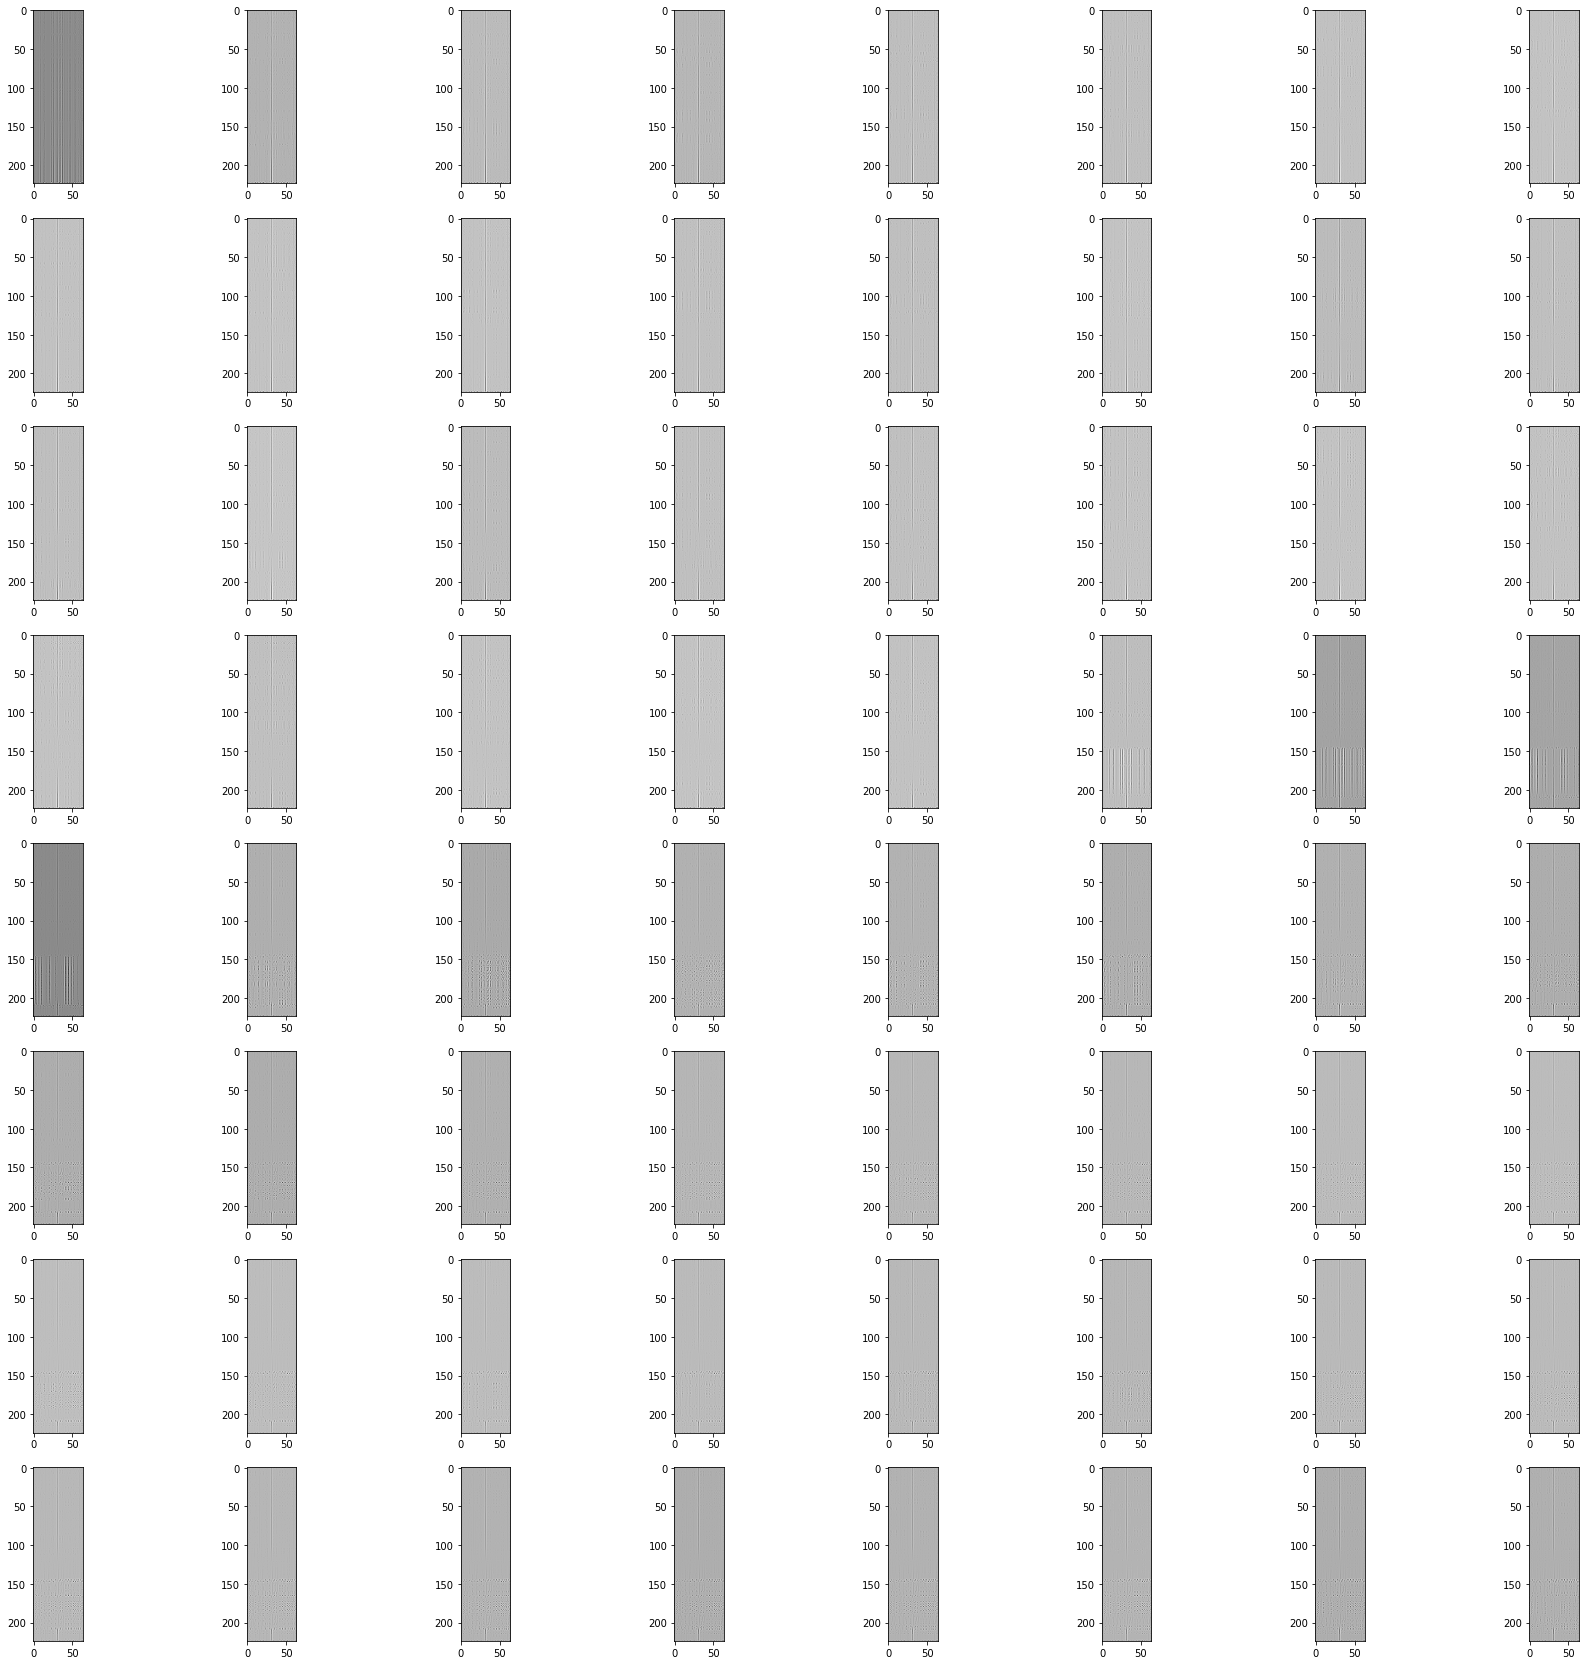

[[145  46]] 22838.82
[[  1813.5286    -969.7738    2503.5276  ...   5174.422     1383.7183
    1219.1326 ]
 [ -1587.4741    1758.4064   -2793.833   ...    972.5743   -1620.509
    -553.36865]
 [ -1285.2445    1420.6804   -1242.5579  ...   1065.5724    -659.1899
     206.396  ]
 ...
 [  2103.4626    -396.24313  -2837.9026  ...    946.3013    -844.6653
    -381.83618]
 [ 15152.202    -1268.7119    3154.9106  ...   1017.9269   12858.961
   13239.237  ]
 [-49272.18     19154.459   -23531.713   ...  13517.051   -39828.367
  -25749.445  ]]


"fig3 = plt.figure(figsize=(30, 30))\nfor i in range(1, columns*rows + 1):\n    out = laps[i-1]\n    #print(out.shape)\n    #plt.imshow(layer_out[0][:,:,2])\n    #img_gray = cv2.cvtColor(layer_out[0][:,:,i-1], cv2.COLOR_BGR2GRAY)\n    dst = laplace(out)\n    #out = \n\n    fig3.add_subplot(rows, columns, i)\n    plt.imshow(dst, cmap=plt.get_cmap('gray'))\nplt.show()"

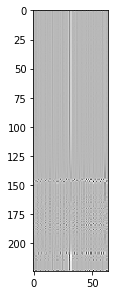

In [153]:
from scipy.ndimage import laplace

'''for i, layer in enumerate(model.layers):
    if 'conv' in layer.name:
        print(i)
        get_layer_output = K.function([model.input], layer.output)
        layer_out = np.array(get_layer_output(img))

        #plt.figure()
        plt.imshow(layer_out[0][:,:,1])'''

ddepth = cv2.CV_8U  
kernel_size = 3

fig = plt.figure(figsize=(30, 30))

columns = 8
rows = 8

imgs = []
get_layer_output = K.function([model.input], model.layers[1].output)
layer_out = np.array(get_layer_output(img))
for i in range(1, columns*rows + 1):
    #plt.imshow(layer_out[0][:,:,2])
    fig.add_subplot(rows, columns, i)
    imgs.append(layer_out[0][:,:,i-1])
    plt.imshow(imgs[-1], cmap=plt.get_cmap('gray'))
plt.show()

laps = []
fig2 = plt.figure(figsize=(30, 30))
for i in range(1, columns*rows + 1):
    out = imgs[i-1]
    #print(out.shape)
    #plt.imshow(layer_out[0][:,:,2])
    #img_gray = cv2.cvtColor(layer_out[0][:,:,i-1], cv2.COLOR_BGR2GRAY)
    dst = cv2.Laplacian(out, cv2.CV_32F )
    laps.append(dst)
    fig2.add_subplot(rows, columns, i)
    plt.imshow(laps[-1], cmap=plt.get_cmap('gray'))
plt.show()

fig3 = plt.figure()
#mag = np.linalg.norm(laps, axis = 0)
mag = np.sum(laps, axis = 0)
#mag /= mag.max()/255.0
plt.imshow(mag, cmap=plt.get_cmap('gray'), interpolation='nearest')


d_i = np.argwhere(mag == np.amax(mag)) 
print(d_i, np.amax(mag))
print(mag)

'''fig3 = plt.figure(figsize=(30, 30))
for i in range(1, columns*rows + 1):
    out = laps[i-1]
    #print(out.shape)
    #plt.imshow(layer_out[0][:,:,2])
    #img_gray = cv2.cvtColor(layer_out[0][:,:,i-1], cv2.COLOR_BGR2GRAY)
    dst = laplace(out)
    #out = 

    fig3.add_subplot(rows, columns, i)
    plt.imshow(dst, cmap=plt.get_cmap('gray'))
plt.show()'''



In [ ]:
def local_arg_exrtrema_2(mat1, mat2):

    #Use a moving window to find local max/min in section. Determine coordinate of max pixel in image.
    idx = []
    thresh = np.abs(np.amax(mat2) - np.abs(np.amin(mat2)))
    #print("Thresh = ", thresh)
    for i in range(1, mat1.shape[0]-1):
        for j in range(1, mat1.shape[1]-1):
            pixel_of_interest = mat2[i,j]
            if np.abs(pixel_of_interest)>0.2:

                neighbours = mat2[i-1:i+2, j-1:j+2]
                neighbours[1,1] = np.NaN
                neighbours_below = mat1[i-1:i+2, j-1:j+2]
                if (pixel_of_interest > np.nanmax(neighbours) and pixel_of_interest > np.nanmax(neighbours_below)) or (pixel_of_interest < np.nanmin(neighbours) and pixel_of_interest < np.nanmin(neighbours_below)):
                    idx.append(np.array([j,i]))

    return np.unique(idx, axis=0)

def local_arg_exrtrema_3(mat1, mat2, mat3):

    #Use a moving window to find local max/min in section. Determine coordinate of max pixel in image.
    idx = []

    for i in range(1, mat1.shape[0]-1):
        for j in range(1, mat1.shape[1]-1):
            pixel_of_interest = mat2[i,j]
            if np.abs(pixel_of_interest)>2000:
                #print(pixel_of_interest)
                neighbours = mat2[i-1:i+2, j-1:j+2]
                neighbours[1,1] = np.NaN
                neighbours_above = mat3[i-1:i+2, j-1:j+2]
                neighbours_below = mat1[i-1:i+2, j-1:j+2]

                if (pixel_of_interest > np.nanmax(neighbours) and pixel_of_interest > np.nanmax(neighbours_above) and pixel_of_interest > np.nanmax(neighbours_below)) or (pixel_of_interest < np.nanmin(neighbours) and pixel_of_interest < np.nanmin(neighbours_above) and  pixel_of_interest < np.nanmin(neighbours_below)):
                    idx.append(np.array([i,j]))

    return idx #np.unique(idx, axis=0)




In [ ]:
test_array = np.array([[ 90,  1,  2,  3,  4],
                       [ 7,  50,  9, 10, 11],
                       [14,  15,   np.NaN, 600, 18],
                       [21, 22, 23, 1, 25],
                       [28, 29, 30, 31, 6]])

#local_argmax(mag)
np.nanmax(test_array)

600.0

In [ ]:
model.layers[1].name


'block1_conv1'

In [ ]:
# A function that does the above step but for any all layers in a block
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def cnn_lap(image, layer_name):
    layer = [l for l in model.layers if layer_name == l.name][0]
    #print(layers)
    mag = []
    if type(layer.output_shape) is list:
        num_channels = layer.output_shape[0][-1]
    else:
        num_channels = layer.output_shape[-1]
    #print(num_channels)

    imgs = []
    get_layer_output = K.function([model.input], layer.output)
    layer_out = np.array(get_layer_output(image))
    for i in range(0, num_channels):
        #plt.imshow(layer_out[0][:,:,2])
        imgs.append(layer_out[0][:,:,i])

    laps = []
    for i in range(0, num_channels):
        out = imgs[i]
        dst = cv2.Laplacian(out, cv2.CV_32F )
        laps.append(dst)

    #mag.append(np.linalg.norm(np.abs(laps), axis = 0))
    mag.append(np.sum(laps, axis = 0))
    #scaled_mag = min_max_scaler.fit_transform(mag[0])

    #mag /= mag.max()/255.0'''
    return mag[0], layer_out
    #return dst

In [ ]:
model.layers[1].output_shape[-1]

64

"mag_input = cnn_lap(img, block=2)\nfig, (ax1, ax2, ax3) = plt.subplots(1, 3)\n\nax1.imshow(mag[0], cmap=plt.get_cmap('gray'))\nax2.imshow(mag[1], cmap=plt.get_cmap('gray'))\nax3.imshow(np.abs(mag[1]-mag[0]), cmap=plt.get_cmap('gray'))"

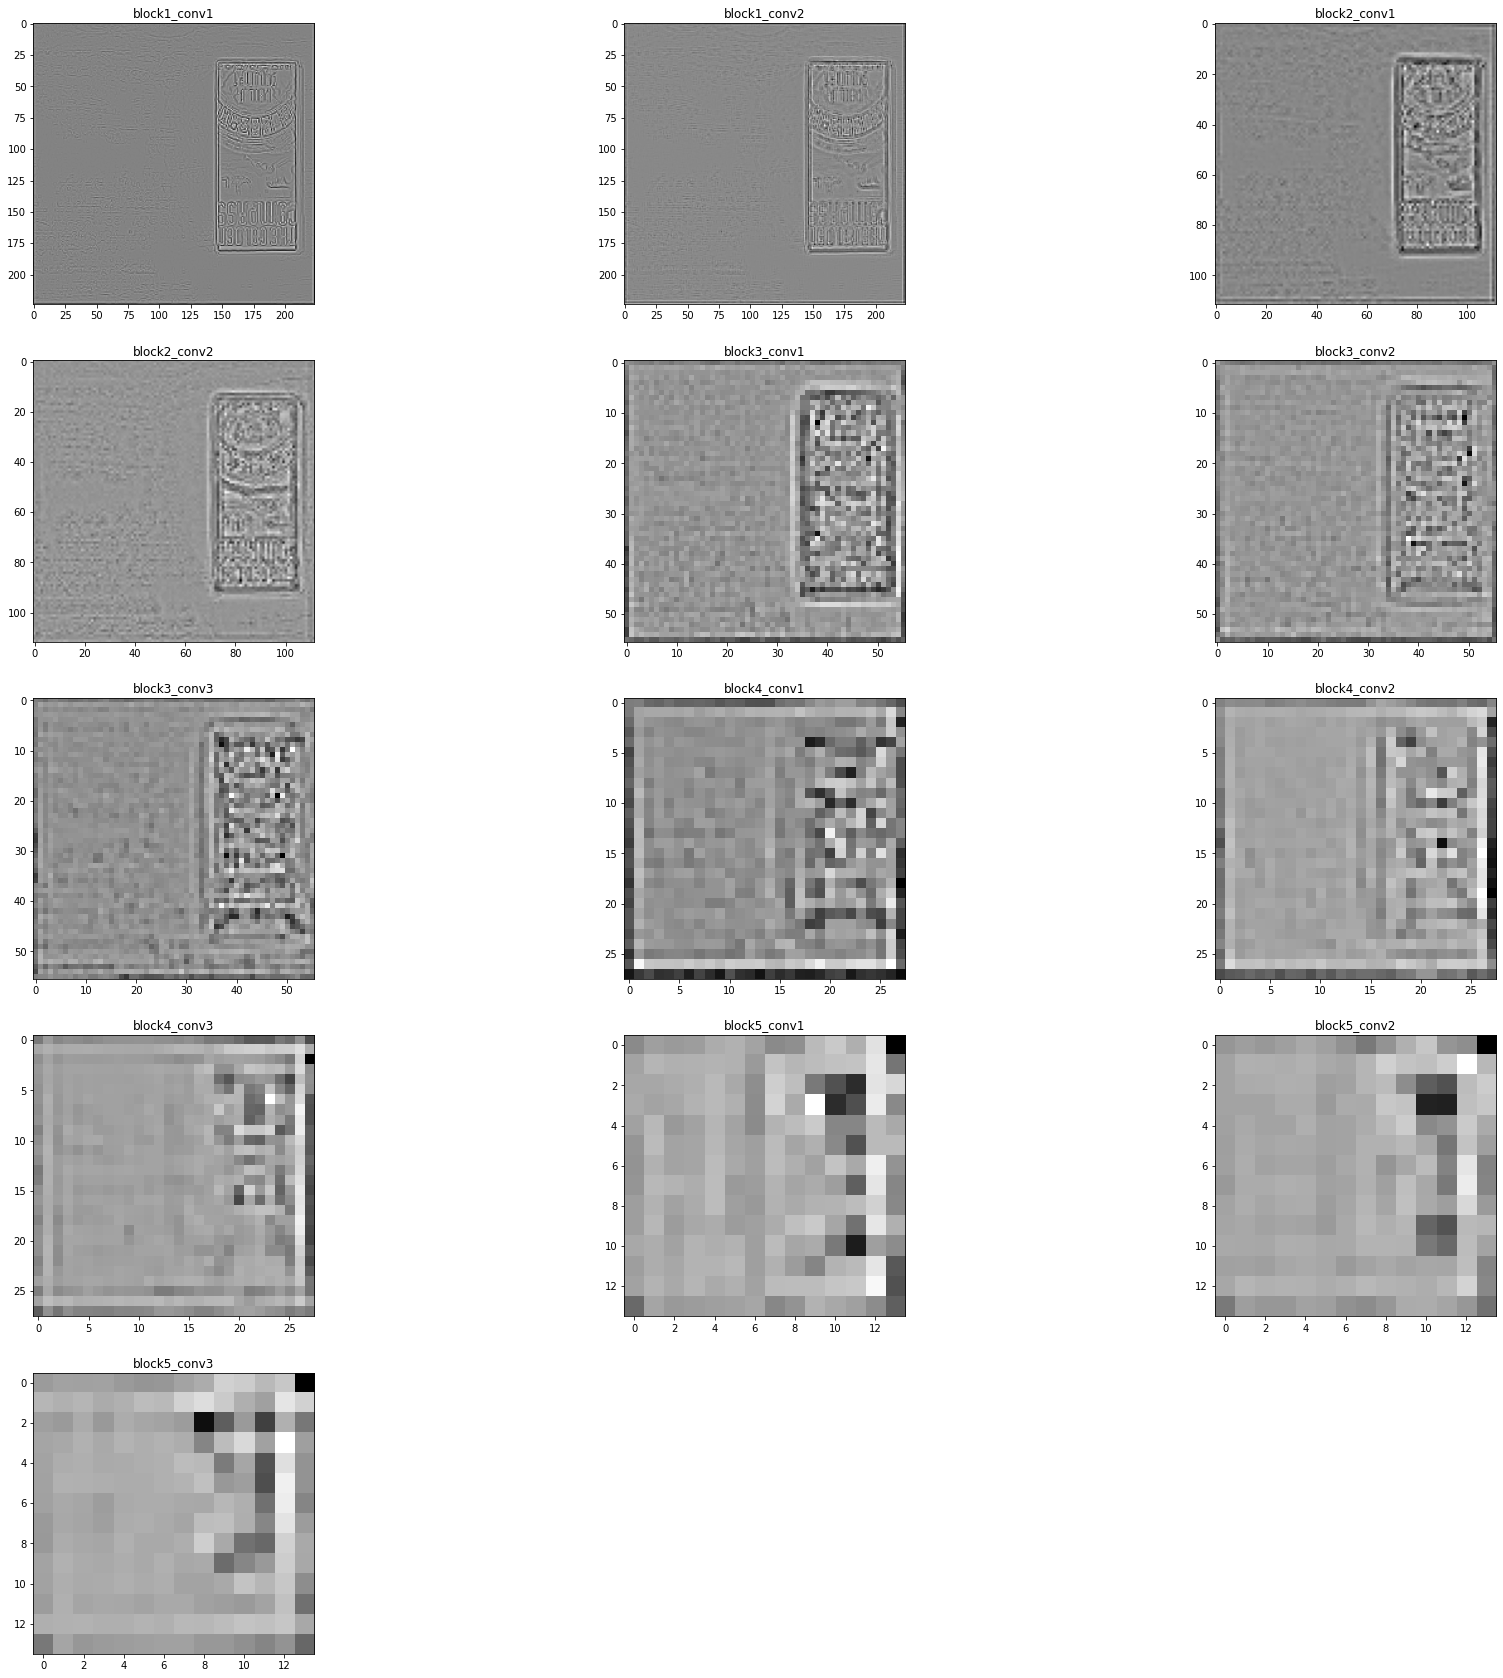

In [ ]:
layers = [l.name for l in model.layers if ('conv' in l.name)]

#plt.subplots(len(layers)/3, 3)

fig = plt.figure(figsize=(30, 30))
for i, layer in enumerate(layers):
    fig.add_subplot(int(np.ceil(len(layers)/3)), 3, i+1)
    mag,_ = cnn_lap(img, layer_name=layer)
    plt.imshow(mag, cmap=plt.get_cmap('gray'))
    plt.title(layer)

'''mag_input = cnn_lap(img, block=2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(mag[0], cmap=plt.get_cmap('gray'))
ax2.imshow(mag[1], cmap=plt.get_cmap('gray'))
ax3.imshow(np.abs(mag[1]-mag[0]), cmap=plt.get_cmap('gray'))'''

#ax3.imshow(mag[2], cmap=plt.get_cmap('gray'))



In [ ]:
mag.shape

(14, 14)

In [ ]:
keypoint_coords = []

layers = [l.name for l in model.layers if ('conv' in l.name)]
for block in range(1,5):
    layers = [l.name for l in model.layers if 'block'+str(block)+'_conv' in l.name]
    if len(layers) == 2:
        #do argmax for 2 images
        mag_1,_ = cnn_lap(img, layer_name=layers[0])
        mag_2,_ = cnn_lap(img, layer_name=layers[1])
        if mag_1.shape != (224, 224):
            mag_1 = cv2.resize(mag_1, (224, 224), interpolation = cv2.INTER_LINEAR )
            mag_2 = cv2.resize(mag_2, (224, 224), interpolation = cv2.INTER_LINEAR )
        coords = local_arg_exrtrema_2(mag_1, mag_2)


    if len(layers) == 3:
        #do argmax for 3 images
        mag_1,_ = cnn_lap(img, layer_name=layers[0])
        mag_2,_ = cnn_lap(img, layer_name=layers[1])
        mag_3,_ = cnn_lap(img, layer_name=layers[2])
        if mag_1.shape != (224, 224):
            mag_1 = cv2.resize(mag_1, (224, 224), interpolation = cv2.INTER_LINEAR )
            mag_2 = cv2.resize(mag_2, (224, 224), interpolation = cv2.INTER_LINEAR )
            mag_3 = cv2.resize(mag_3, (224, 224), interpolation = cv2.INTER_LINEAR )
        coords = local_arg_exrtrema_3(mag_1, mag_2, mag_3)

    keypoint_coords.extend( coords) # np.concatenate((keypoint_coords, coords))
keypoint_coords = np.unique(keypoint_coords, axis=0)

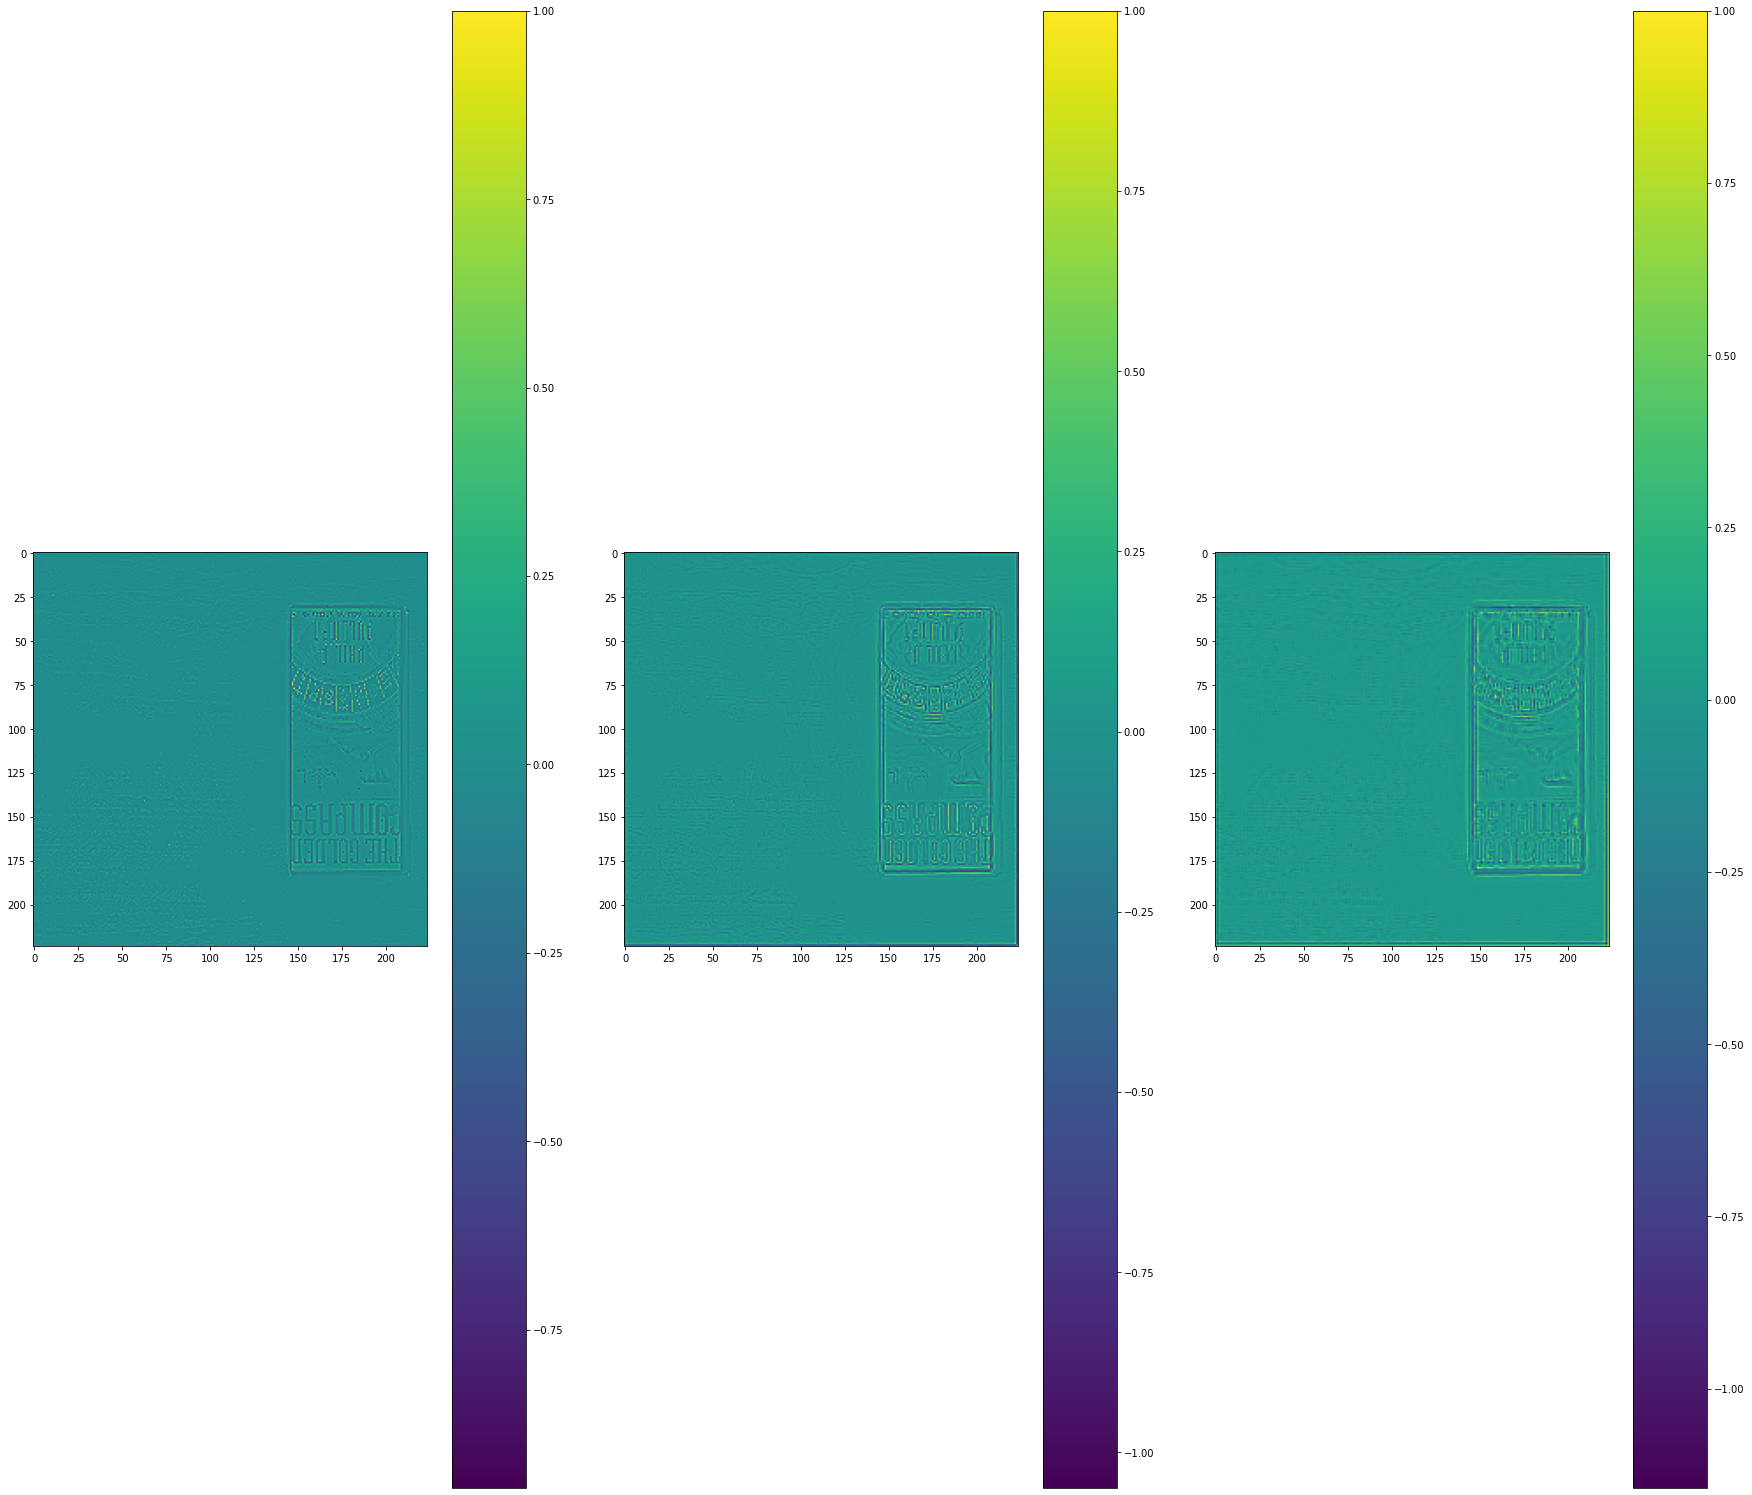

In [ ]:
keypoint_coords = []

#do argmax for 3 images
#layers = copy() #[l.name for l in model.layers if ('conv' in l.name)]

mag_1,_ = cnn_lap(img, layer_name=model.layers[0].name)
mag_2,layer_out = cnn_lap(img, layer_name=model.layers[1].name)
mag_3,_ = cnn_lap(img, layer_name=model.layers[2].name)

mag_1 *= 1.0/mag_1.max()   
mag_2 *= 1.0/mag_2.max()   
mag_3 *= 1.0/mag_3.max()   


fig = plt.figure(figsize=(30, 30))

plt.subplot(1,3,1)
plt.imshow(mag_1)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(mag_2)
plt.colorbar()


plt.subplot(1,3,3)
plt.imshow(mag_3)
plt.colorbar()
mag_1 = cv2.resize(mag_1, (224, 224), interpolation = cv2.INTER_LINEAR )
mag_2 = cv2.resize(mag_2, (224, 224), interpolation = cv2.INTER_LINEAR )
mag_3 = cv2.resize(mag_3, (224, 224), interpolation = cv2.INTER_LINEAR )
keypoint_coords = np.unique(local_arg_exrtrema_2(mag_1, mag_2 ), axis=0)

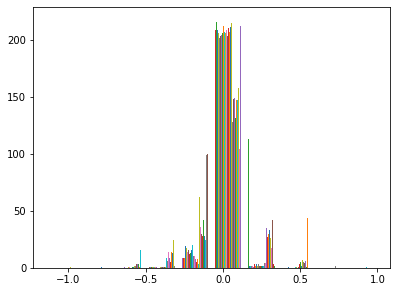

In [ ]:
plt.hist(mag_3)
plt.show() 

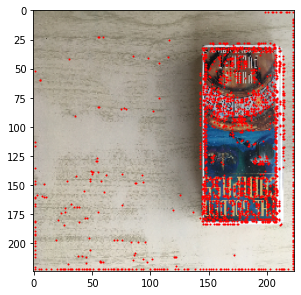

In [ ]:
i = image.load_img('./SYS809_projet2021_sequences1/livre1.JPG' , target_size=(224, 224))    

##
#plt.gca().invert_yaxis()
plt.figure()
plt.imshow(i)
plt.scatter(5,60, s=[2], c='r')
plt.scatter(list(list(zip(*keypoint_coords))[0]), list(list(zip(*keypoint_coords))[1]), s=[1], c='r')
plt.show()


In [ ]:
keypoint_coords

array([[  1,  11],
       [  1,  13],
       [  1,  15],
       ...,
       [222, 218],
       [222, 220],
       [222, 222]])

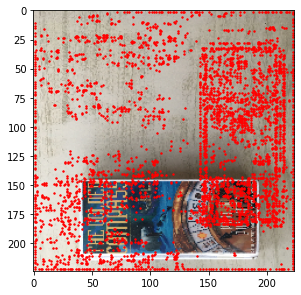

In [ ]:
i = image.load_img('./SYS809_projet2021_sequences1/new_livre1.JPG' , target_size=(224, 224))    

##
#plt.gca().invert_yaxis()
plt.figure()
plt.imshow(i)
plt.scatter(5,60, s=[2], c='r')
plt.scatter(list(list(zip(*keypoint_coords))[0]), list(list(zip(*keypoint_coords))[1]), s=[2], c='r')
plt.show()


In [207]:
#def getDescriptors(layer, coords):
    
A = np.array([[1,2,3,88],[6,7,8,99],[9,8,10,66]])
B = np.array([[88,99,33,88],[67,77,83,33],[96,84,103,434]])
C = np.array([[18,19,13,767],[17,17,13,56],[16,14,13,56]])
D = np.array([[28,26,23,45],[27,22,255,43],[26,24,223,346]])

Arr=[]
Y = np.stack([A,B,C,D])
print(Y.shape)
Arr.append(np.array([Y[:, 0:3, 0:3 ]]).flatten())
print(Arr)


(4, 3, 4)
[array([  1,   2,   3,   6,   7,   8,   9,   8,  10,  88,  99,  33,  67,
        77,  83,  96,  84, 103,  18,  19,  13,  17,  17,  13,  16,  14,
        13,  28,  26,  23,  27,  22, 255,  26,  24, 223])]


In [ ]:
Y=[[1,2], [3,4]]
for r,c in Y:
    print(r,c)


1 2
3 4


In [ ]:
def getDescriptors(layer_output, coords):
    descriptors = []
    for row, col in  coords:
        descriptors.append(layer_output[row, col, : ])
    return descriptors


In [ ]:
keypoint_coords[0]

array([ 1, 52])

In [ ]:
print(layer_out[0].shape)
#getDescriptors(layer_out[0], keypoint_coords)
#layer_out[0][1,52, 1]


(224, 224, 64)


In [ ]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)


In [209]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     